In [146]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kurtosis,skew
from scipy import stats
import yfinance as yf

In [147]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [148]:
ticker="CL=F"

data=yf.download(ticker, start='2023-06-20', end='2023-07-20', interval='30m')


[*********************100%***********************]  1 of 1 completed


In [149]:
train, test = train_test_split(data, test_size = 0.2, shuffle = False)

In [150]:
trainf = train['Close']

In [151]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = trainf.copy()
# choose a number of time steps
n_steps = 10
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [152]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X)

In [153]:
scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(y.reshape(-1,1))

In [154]:
X,y = scaled_train, scaled_y

In [155]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [156]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [157]:
# define model
model = Sequential()
model.add(LSTM(100, activation='swish', input_shape=(n_steps, n_features), return_sequences=True))  #Newest Activation function found by Google
model.add(LSTM(100, activation = 'swish'))                                                           #You can also use a Relu, both works fine
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics = 'mse')

In [66]:
model.fit(X,y,epochs=100)

Epoch 1/100
 1/22 [>.............................] - ETA: 2s - loss: 0.2584 - mse: 0.2584

c:\programdata\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


22/22 [==============================] - 3s 113ms/step - loss: 0.1649 - mse: 0.1649
Epoch 2/100
22/22 [==============================] - 2s 113ms/step - loss: 0.0226 - mse: 0.0226
Epoch 3/100
22/22 [==============================] - 2s 112ms/step - loss: 0.0117 - mse: 0.0117
Epoch 4/100
22/22 [==============================] - 2s 112ms/step - loss: 0.0049 - mse: 0.0049
Epoch 5/100
22/22 [==============================] - 2s 112ms/step - loss: 0.0039 - mse: 0.0039
Epoch 6/100
22/22 [==============================] - 2s 112ms/step - loss: 0.0037 - mse: 0.0037
Epoch 7/100
22/22 [==============================] - 2s 113ms/step - loss: 0.0034 - mse: 0.0034
Epoch 8/100
22/22 [==============================] - 3s 119ms/step - loss: 0.0033 - mse: 0.0033
Epoch 9/100
22/22 [==============================] - 2s 113ms/step - loss: 0.0031 - mse: 0.0031
Epoch 10/100
22/22 [==============================] - 2s 113ms/step - loss: 0.0028 - mse: 0.0028
Epoch 11/100
22/22 [==============================]

In [67]:
pred=model.predict(X)

22/22 [==============================] - 1s 41ms/step


In [71]:
pred

array([[0.4451834 ],
       [0.4580868 ],
       [0.4615836 ],
       [0.45341974],
       [0.43651828],
       [0.4208343 ],
       [0.3911203 ],
       [0.3557042 ],
       [0.32620424],
       [0.3085127 ],
       [0.30053765],
       [0.29870576],
       [0.30386412],
       [0.31221992],
       [0.32694995],
       [0.34918857],
       [0.37106597],
       [0.38901627],
       [0.40120375],
       [0.40807772],
       [0.41559184],
       [0.41747472],
       [0.41628045],
       [0.41344932],
       [0.41109815],
       [0.4115625 ],
       [0.41162604],
       [0.42466784],
       [0.44495225],
       [0.4653355 ],
       [0.48721105],
       [0.50915426],
       [0.52753013],
       [0.5403779 ],
       [0.54649794],
       [0.5497008 ],
       [0.5511877 ],
       [0.55266064],
       [0.553297  ],
       [0.5547196 ],
       [0.55519754],
       [0.55142087],
       [0.54920894],
       [0.5483728 ],
       [0.5484994 ],
       [0.5480437 ],
       [0.5480068 ],
       [0.548

In [72]:
y

array([[0.4452192 ],
       [0.42131504],
       [0.38247048],
       [0.35358593],
       [0.36553763],
       [0.27191266],
       [0.23605603],
       [0.24900396],
       [0.27888474],
       [0.29183267],
       [0.29681306],
       [0.32071722],
       [0.32669308],
       [0.36454216],
       [0.40836634],
       [0.40537842],
       [0.40139426],
       [0.39442218],
       [0.38944256],
       [0.41334673],
       [0.38944256],
       [0.38545841],
       [0.38346595],
       [0.3874501 ],
       [0.39940257],
       [0.39143426],
       [0.46513922],
       [0.49203207],
       [0.49203207],
       [0.51494001],
       [0.53187286],
       [0.53286833],
       [0.5278887 ],
       [0.51693247],
       [0.52191209],
       [0.52490078],
       [0.52888417],
       [0.52589624],
       [0.53187286],
       [0.52689247],
       [0.50697246],
       [0.5179287 ],
       [0.52191209],
       [0.52390455],
       [0.51892416],
       [0.52091662],
       [0.52091662],
       [0.511

In [112]:
len(data["Close"])

893

In [109]:
inverse_pred = scaler_y.inverse_transform(pred)

In [113]:
df=pd.DataFrame(data=inverse_pred)
df.columns=["prediction"]

In [114]:
df

,prediction
0,71.749641
1,71.879189
2,71.914299
3,71.832336
4,71.662643
...,...
699,77.728951
700,77.709679
701,77.641014
702,77.611183


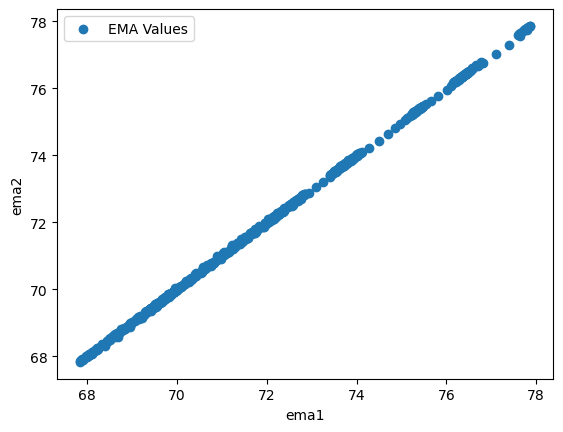

In [158]:
ema1 = df["prediction"].ewm(com=0.09).mean()
ema2 = df["prediction"].ewm(com=0.40).mean()
plt.scatter(ema1, ema2, label="EMA Values")

plt.xlabel("ema1")
plt.ylabel("ema2")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   ema2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.832e+06
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:10:17   Log-Likelihood:                 1625.6
No. Observations:                 704   AIC:                            -3247.
Df Residuals:                     702   BIC:                            -3238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0999      0.026      3.898      0.0

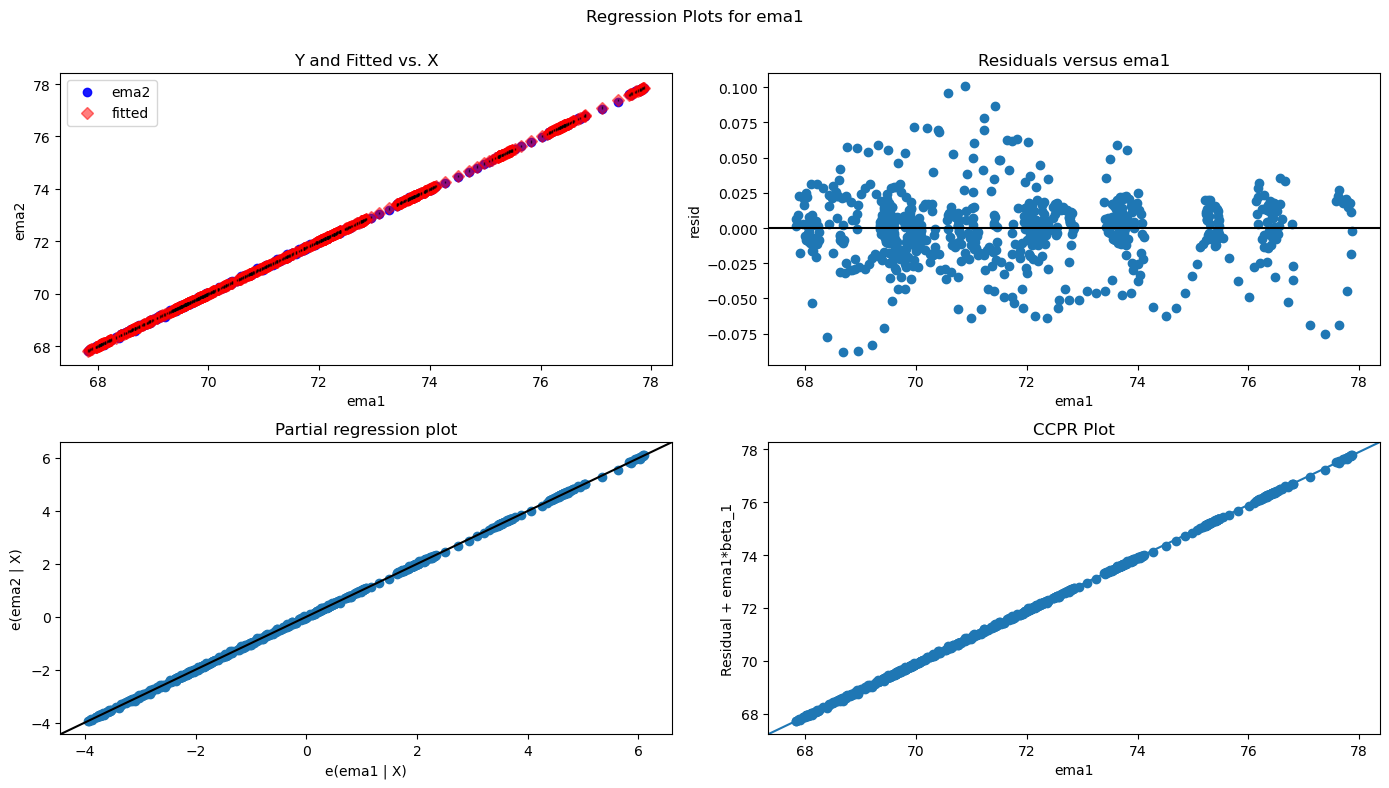

In [159]:
new=pd.DataFrame(ema1) #creating a data frame for linear regression (OLS)
new['ema2']=ema2
new.columns=["ema1","ema2"]
new['const']=1
X=['const','ema2']
Y=[new['ema1']]

"""importing the library for linear regression"""
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
  
#fitting the model 

linear_model = ols("ema2 ~ ema1", data=new).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model, 1,
                                    fig=fig)

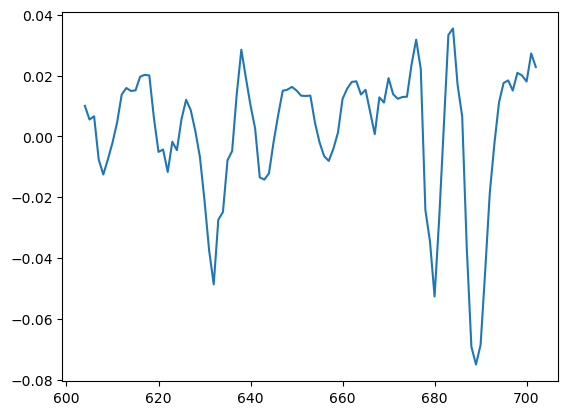

In [117]:
"""getting the residual values and residual plot for the last 100 periods"""

residual_values=linear_model.resid

plt.plot(residual_values[-100:-1])

In [118]:
#performing the ADF test for verification of cointegration

from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(residual_values)
print('ADF Statistic: %f' % ADF_result[0])
print('p-value: %f' % ADF_result[1])
print('Critical Values:')
for key, value in ADF_result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.586520
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [119]:
linear_model.params[1]

0.9985724440275626

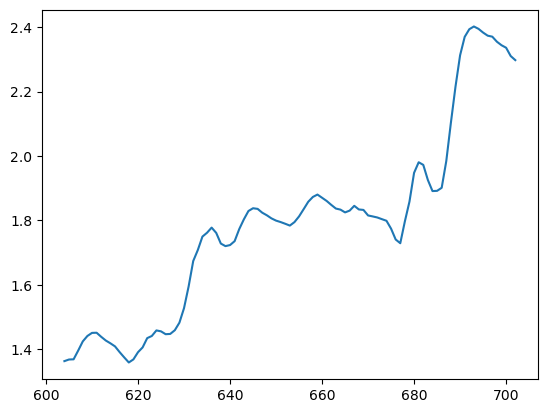

In [120]:
"""Creating the spread of two EMA's with normalizing the ema2 with linear_model data"""
import scipy.stats as stats
import math

spread=ema1-linear_model.params[0]*ema2
z_value=stats.zscore(spread) #calculating the z -scores
plt.plot(z_value[-100:-1])  #plottng 100 period data



In [121]:
def get_slope(y2,x2,y1,x1):
    m=(y2-y1)/(x2-x1)
    return m
        
slope=[]
for i in range(1,len(z_value)):
    v=get_slope(z_value[i], i, z_value[i-1], i-1)
    slope.append(v)
   



In [122]:
len(slope)

703

In [123]:
""" storing the index where the slope changes the direction towards negative and positive"""

positive_slope=[]
negative_slope=[]

for i in range(0,len(slope)):
    
    if( slope[i]<0and i>0 and slope[i-1]>0): 
        negative_slope.append(i)
    
    elif (slope[i]>0and i>0 and slope[i-1]<0):
        positive_slope.append(i)

df["position"]=np.nan
 
  
for i in range(len(df)): 
    
   
    if( i in negative_slope): 
        df["position"].iloc[i]=-1    #sell
    
    elif( i in positive_slope):
        df["position"].iloc[i]=1   #buy
    
    else:
        df["position"].iloc[i]=0   #hold
        
""" looking at data with our positions at each period"""        
df

C:\Users\shiv.pandey\AppData\Local\Temp\ipykernel_34456\2758720288.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["position"].iloc[i]=0   #hold
C:\Users\shiv.pandey\AppData\Local\Temp\ipykernel_34456\2758720288.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["position"].iloc[i]=-1    #sell
C:\Users\shiv.pandey\AppData\Local\Temp\ipykernel_34456\2758720288.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["positio

,prediction,position
0,71.749641,0.0
1,71.879189,0.0
2,71.914299,-1.0
3,71.832336,0.0
4,71.662643,0.0
...,...,...
699,77.728951,0.0
700,77.709679,0.0
701,77.641014,0.0
702,77.611183,0.0


In [125]:
slope.append(0)

In [126]:
df["slope"]=slope

In [127]:
df["z_score"]=z_value

In [128]:
data["Close"]

Datetime
2023-06-20 00:00:00    70.879997
2023-06-20 01:00:00    70.790001
2023-06-20 01:30:00    70.760002
2023-06-20 02:00:00    70.760002
2023-06-20 02:30:00    71.029999
                         ...    
2023-07-19 19:00:00    75.230003
2023-07-19 19:30:00    75.199997
2023-07-19 20:00:00    75.230003
2023-07-19 20:30:00    75.269997
2023-07-19 22:30:00    75.410004
Name: Close, Length: 893, dtype: float64

In [129]:
df["close"]=data["Close"].values[9:]

ValueError: Length of values (884) does not match length of index (704)

In [145]:
df


array([[0.4452192 ],
       [0.42131504],
       [0.38247048],
       [0.35358593],
       [0.36553763],
       [0.27191266],
       [0.23605603],
       [0.24900396],
       [0.27888474],
       [0.29183267],
       [0.29681306],
       [0.32071722],
       [0.32669308],
       [0.36454216],
       [0.40836634],
       [0.40537842],
       [0.40139426],
       [0.39442218],
       [0.38944256],
       [0.41334673],
       [0.38944256],
       [0.38545841],
       [0.38346595],
       [0.3874501 ],
       [0.39940257],
       [0.39143426],
       [0.46513922],
       [0.49203207],
       [0.49203207],
       [0.51494001],
       [0.53187286],
       [0.53286833],
       [0.5278887 ],
       [0.51693247],
       [0.52191209],
       [0.52490078],
       [0.52888417],
       [0.52589624],
       [0.53187286],
       [0.52689247],
       [0.50697246],
       [0.5179287 ],
       [0.52191209],
       [0.52390455],
       [0.51892416],
       [0.52091662],
       [0.52091662],
       [0.511

In [141]:
#calculating the PnL for our postions 

""" we are having alternate trade signals. so if we are buy then at sell signal we just need to subtract the last price 
traded from the current price for PnL"""
test=False
p=0
last_postion=0
no_trades=0
p_l=[0]
for index,rows in df.iterrows(): 
    if(rows["position"]==0):
        continue
        
    elif(rows["position"]==-1 and test==False):  #test=Flase is given for entering in the market 
        no_trades+=1
        p=rows["prediction"]
        test=True
        
    elif(rows["position"]==1 and test==False):
        
        no_trades+=1
        p=rows["prediction"]
       
        test=True #keeping test as true after entering in the market 
        
    elif(rows["position"]==-1 and test==True):
        p_l.append(-p+rows["prediction"])
        p=rows["prediction"]
        no_trades+=1
          
    elif(rows["position"]==1 and test==True):               
        no_trades+=1
        p_l.append(p-rows["prediction"])
        p=rows["prediction"]

position=df["position"][df["position"]!=0]            #for last position
last_position=position.iloc[-1]


In [143]:
""" modifying the last position"""
if (no_trades%2==0):
    last_position=0

""" getting the time """

time=data.index[df["position"]!=0]

""" getting the transaction prices=Closing prices"""

transaction_prices= df["prediction"][df["position"]!=0]

""" getting the holding period """
holding_period=[]
for i in range(len(time)):
    if(i>0):
        holding_period.append(time[i]-time[i-1])
    else:
        holding_period.append(np.nan)

""" making it a Data Frame"""

inputs=[time,transaction_prices, position,holding_period, p_l ]
df=pd.DataFrame(position)
df.index=time
df["Closing Prices"]= transaction_prices
df["holding period"]=holding_period
df["PnL"]=p_l

IndexError: Boolean index has wrong length: 704 instead of 893

In [144]:
p_l

[0,
 1.6352920532226562,
 1.1924362182617188,
 0.06401824951171875,
 1.4467544555664062,
 0.068511962890625,
 0.0012664794921875,
 0.00494384765625,
 0.0011444091796875,
 0.3204193115234375,
 0.0886077880859375,
 3.0165176391601562,
 0.07236480712890625,
 0.0265350341796875,
 0.00630950927734375,
 0.66375732421875,
 0.01419830322265625,
 0.3581390380859375,
 0.12201690673828125,
 0.27484893798828125,
 1.5827484130859375,
 0.5642318725585938,
 0.21018218994140625,
 0.239532470703125,
 0.2119903564453125,
 0.2296295166015625,
 0.4256134033203125,
 0.24147796630859375,
 0.40512847900390625,
 1.4188308715820312,
 0.329681396484375,
 0.9351882934570312,
 0.11319732666015625,
 0.04244232177734375,
 0.21521759033203125,
 0.2252960205078125,
 0.10884857177734375,
 0.3043365478515625,
 1.8092041015625,
 0.2519378662109375,
 0.130218505859375,
 0.1703338623046875,
 0.0229949951171875,
 0.0256805419921875,
 0.5207595825195312,
 0.07538604736328125,
 0.25304412841796875,
 0.15752410888671875,
 0.0